In [2]:
# Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [3]:
Domestic = pd.read_csv(r"D:\Dataset\-Telangana-Government-Tourism\Data\domestic_visitors.csv")
Foreign = pd.read_csv(r"D:\Dataset\-Telangana-Government-Tourism\Data\foreign_visitors.csv")

In [4]:
# Printing top 5 Rows of Domestic Dataset

Domestic.head()

,district,date,month,year,visitors
0,Adilabad,2016-01-01,January,2016,792136
1,Adilabad,2016-01-02,February,2016,937820
2,Adilabad,2016-01-03,March,2016,582946
3,Adilabad,2016-01-04,April,2016,341948
4,Adilabad,2016-01-05,May,2016,252887


In [5]:
# Printing top 5 Rows of Foreign Dataset

Foreign.head()

,district,date,month,year,visitors
0,Adilabad,2016-01-01,January,2016,2
1,Adilabad,2016-01-02,February,2016,0
2,Adilabad,2016-01-03,March,2016,2
3,Adilabad,2016-01-04,April,2016,0
4,Adilabad,2016-01-05,May,2016,0


In [6]:
print("Domestic Dataset total number of rows and columns :", Domestic.shape[0])
print("Foreign Dataset total number of rows and columns :", Foreign.shape[1])

Domestic Dataset total number of rows and columns : 1482
Foreign Dataset total number of rows and columns : 5


In [7]:
# Checking the null value of Domestic Dataset

Domestic.isnull().sum()

district    0
date        0
month       0
year        0
visitors    0
dtype: int64

In [8]:
# Checking the null value of Foreign Dataset

Foreign.isnull().sum()

district    0
date        0
month       0
year        0
visitors    0
dtype: int64

In [9]:
# Checking the Duplicate value of Domestic Dataset

Domestic.duplicated().sum()

0

In [10]:
# Checking the Duplicated value of Foreign Dataset

Foreign.duplicated().sum()

0

In [11]:
Foreign.rename(columns={'visitors': 'foriegn_visitors'}, inplace=True)

In [12]:
Domestic.rename(columns={'visitors': 'domestic_visitors'}, inplace=True)

In [13]:
df = pd.concat([Foreign, Domestic['domestic_visitors']], axis=1)

In [14]:
df.isnull().sum()

district              0
date                  0
month                 0
year                  0
foriegn_visitors      0
domestic_visitors    30
dtype: int64

In [15]:
df.fillna(0, inplace=True)

In [16]:
df.isnull().sum()

district             0
date                 0
month                0
year                 0
foriegn_visitors     0
domestic_visitors    0
dtype: int64

In [17]:
df.shape

(1512, 6)

In [18]:
df.domestic_visitors = df.domestic_visitors.astype(int)
df.year = df.year.astype(int)

In [19]:
df['total_visitors'] = df['domestic_visitors'] + df['foriegn_visitors']

In [20]:
df.head()

,district,date,month,year,foriegn_visitors,domestic_visitors,total_visitors
0,Adilabad,2016-01-01,January,2016,2,792136,792138
1,Adilabad,2016-01-02,February,2016,0,937820,937820
2,Adilabad,2016-01-03,March,2016,2,582946,582948
3,Adilabad,2016-01-04,April,2016,0,341948,341948
4,Adilabad,2016-01-05,May,2016,0,252887,252887


In [21]:
df.head(2)

,district,date,month,year,foriegn_visitors,domestic_visitors,total_visitors
0,Adilabad,2016-01-01,January,2016,2,792136,792138
1,Adilabad,2016-01-02,February,2016,0,937820,937820


In [22]:
grouped_data = df.groupby('district')['domestic_visitors'].sum()

In [23]:
top_10_districts = grouped_data.sort_values(ascending=False).head(10)

In [24]:
pd.DataFrame(top_10_districts)

,domestic_visitors
district,
Hyderabad,73184713
Warangal (Urban),40881415
Rajanna Sircilla,26654379
Bhadradri Kothagudem,22585587
Jayashankar Bhoopalpally,20978330
Adilabad,19363417
Medak,15090069
Mahbubnagar,14915113
Nizamabad,12024670


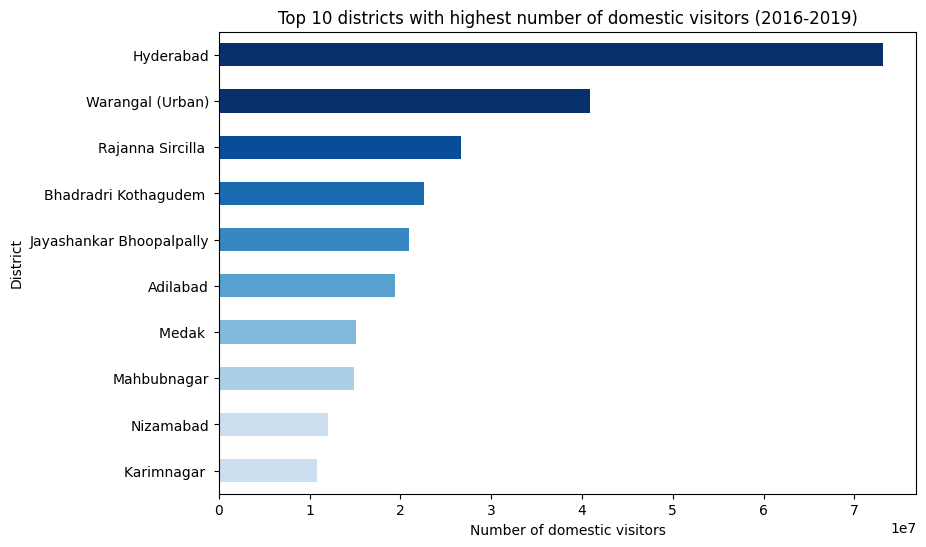

In [25]:
plt.figure(figsize=(9,6))

# Define the number of colors in the gradient
n_colors = 10

# Create a color map from the 'Blues' colormap
cmap = plt.cm.get_cmap('Blues', n_colors)

# Generate a sequence of colors from dark to light
colors = cmap(np.linspace(0.2, 1.0, n_colors))

# Plot the top 10 districts in a horizontal bar chart with the color gradient
top_10_districts.sort_values(ascending=True).plot(kind='barh', color=colors)

# Set the title and axis labels
plt.title('Top 10 districts with highest number of domestic visitors (2016-2019)')
plt.xlabel('Number of domestic visitors')
plt.ylabel('District')

# Display the plot
plt.show()


### 2 List down the top 3 districts based on compounded annual growth rate (CAGR) of visitor between (2016 - 2019)?


**(Insight: Districts that are growing)**

To calculate the compounded annual growth rate (CAGR) of visitors for each district between 2016-2019, we can use the following formula:

CAGR = (Ending value / Beginning value)^(1 / No. of years) - 1

We can start by grouping the data by district and then calculate the CAGR for each district based on the number of visitors between 2016-2019. Then we can sort the CAGR values in descending order to get the top 3 growing districts.

In [26]:
# Filter the DataFrame to include only years between 2016 and 2019
filtered = df[(df['year'] >= 2016) & (df['year'] <= 2019)]

# Group the DataFrame by district and calculate the CAGR for each district
def calculate_cagr(x):
    if len(x) > 1 and 0 not in x.values:
        return (x.max() / x.min()) ** (1/3) - 1
    else:
        return np.nan

grouped = filtered.groupby('district').agg({'total_visitors': calculate_cagr})

# Sort the districts in descending order of their CAGR and return the top 3 districts
top_districts = grouped.sort_values('total_visitors', ascending=False).head(3)

# Print the top districts and their CAGR
print("Top 3 districts based on CAGR of visitors (2016-2019):")
print(top_districts)

Top 3 districts based on CAGR of visitors (2016-2019):
                  total_visitors
district                        
Warangal (Urban)       48.091532
Nizamabad              24.928713
Khammam                11.537669


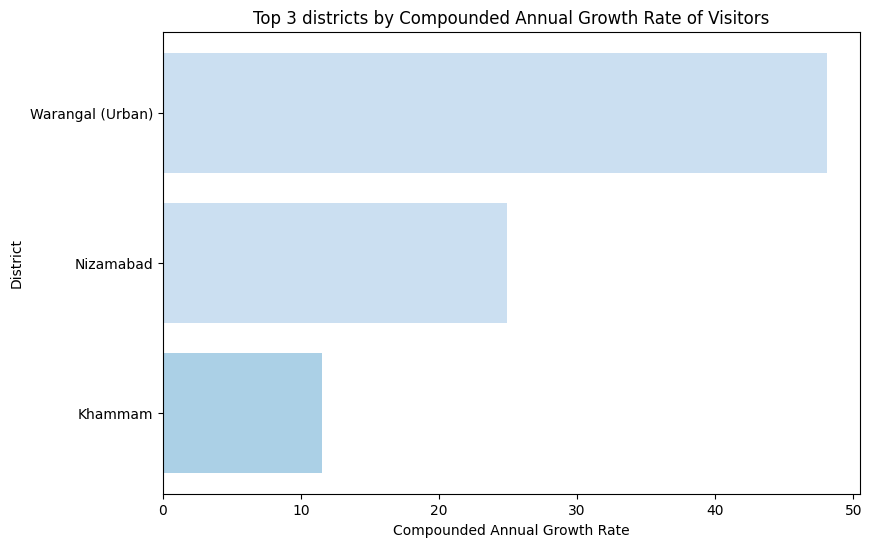

In [27]:
plt.figure(figsize=(9,6))

# Define the number of colors in the gradient
n_colors = 10

# Create a color map from the 'Blues' colormap
cmap = plt.cm.get_cmap('Blues', n_colors)

# Generate a sequence of colors from dark to light
colors = cmap(np.linspace(0.2, 1.0, n_colors))

# create a horizontal bar chart

plt.barh(top_districts.index, top_districts['total_visitors'], color = colors)

# Add a title and lables to the chart

plt.title('Top 3 districts by Compounded Annual Growth Rate of Visitors')
plt.xlabel('Compounded Annual Growth Rate')
plt.ylabel('District')

# Invert the y-axis to show the districts in descending order  
plt.gca().invert_yaxis()

# Display the plot
plt.show()


### 3. List down the bottom 3 districts based on compounded annual growth rate (CAGR) of visitors between(2016-2019)?

**(Insight: Districts that are declining)**

In [28]:
# Filter the DataFrame to include only years between 2016 and 2019
filtered = df[(df['year'] >= 2016) & (df['year'] <= 2019)]

# Group the DataFrame by district and calculate the CAGR for each district
def calculate_cagr(x):
    if len(x) > 1 and 0 not in x.values:
        return (x.max() / x.min()) ** (1/3) - 1
    else:
        return np.nan

grouped = filtered.groupby('district').agg({'total_visitors': calculate_cagr})

# Sort the districts in descending order of their CAGR and return the top 3 districts
bottom_districts = grouped.sort_values('total_visitors', ascending=True).head(3)

# Print the top districts and their CAGR
print("bottom 3 districts based on CAGR of visitors (2016-2019):")
print(bottom_districts)

bottom 3 districts based on CAGR of visitors (2016-2019):
             total_visitors
district                   
Mulugu             0.452102
Hyderabad          3.103451
Mahbubnagar        3.738375


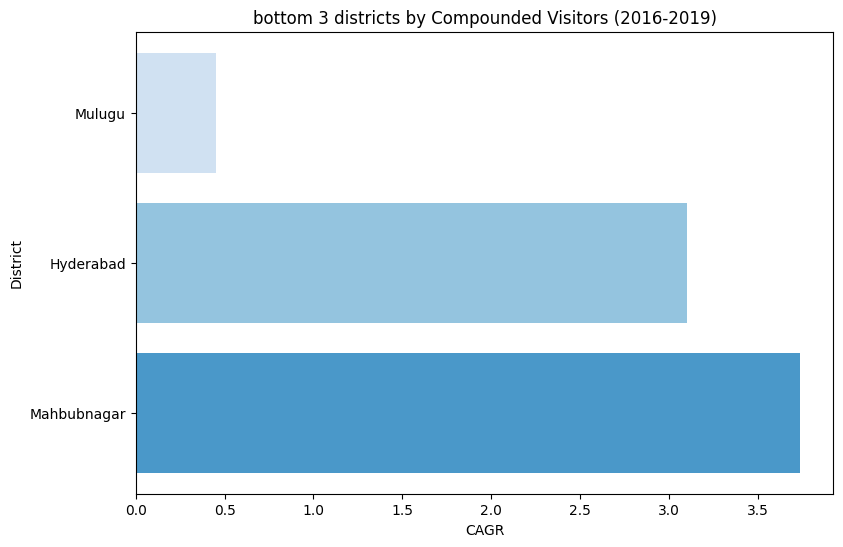

In [29]:
plt.figure(figsize=(9,6))

# Define the number of colors in the gradient
n_colors = 6

# Create a color map from the 'Blues' colormap
cmap = plt.cm.get_cmap('Blues', n_colors)

# Generate a sequence of colors from dark to light
colors = cmap(np.linspace(0.2, 1.0, n_colors))

# create a horizontal bar chart

plt.barh(bottom_districts.index, bottom_districts['total_visitors'], color = colors)

# Add a title and lables to the chart

plt.title('bottom 3 districts by Compounded Visitors (2016-2019)')
plt.xlabel('CAGR')
plt.ylabel('District')

# Invert the y-axis to show the districts in descending order  
plt.gca().invert_yaxis()

# Display the plot
plt.show()


### 4. What are the peak and low season months for Hyderabad based on the data from 2016 to 2019 for Hyderabad district ?


**(Insight: Government can plan well for the peak seasons and boost low seasons by introducing new events)**

In [30]:
# Filter the DataFrame to include only data for Hyderabad district from 2016 and 2019

hyd_data = df[(df['district']== 'Hyderabad') & (df['year'].between(2016, 2019))]

# Group the data by month and calculate the average number of visitors for each month

grouped_data = hyd_data.groupby('month').agg({'total_visitors': 'mean'})

# Sort the data in descending order of average visitors and print the top and bottom months

top_month = grouped_data.sort_values('total_visitors', ascending=False).head(1).index[0]
bottom_month = grouped_data.sort_values('total_visitors', ascending=True).head(1).index[0]

print(f"The peak season month for Hyderabad is {top_month}, and the low season month is {bottom_month}.")

The peak season month for Hyderabad is June, and the low season month is February.
